# Homework 2: Coding

**Due Monday September 23rd, 11:59pm.**

**This is an individual assignment.**

**Submit hw2.py file to Gradescope (you may submit as many times as you'd like before the deadline).**

### Imports and Data

In [0]:
"""
Import required libraries.

DON'T comment out these imports when submitting your final hw2.py file.
"""
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [4]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

Please comment out *everything* in this cell (including the import) when submitting your .py file.
"""
from google.colab import files
uploaded = files.upload()
! unzip hw2_data.zip

Saving hw2_data.zip to hw2_data.zip
Archive:  hw2_data.zip
   creating: hw2_data/Data-set-1/
   creating: hw2_data/Data-set-1/Train-subsets/
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_10_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_100_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_20_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_30_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_40_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_50_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_60_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_70_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_80_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/X_train_90_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/y_train_10_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/y_train_100_.txt  
  inflating: hw2_data/Data-set-1/Train-subsets/y_train_20_.txt  
  inflating:

## Q1: Least Squares Regression

Implement the following functions for question 1. Please **do not** use the sklearn implementation of linear regression or other imports beyond those listed above.

### L1 and L2 error

In [0]:
def L2_error(y, y_hat):
    """
    L2 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L2 error
    """
#     L2_error = 0
#     L2_error = np.linalg.norm(y - y_hat)
#     L2_error = L2_error**2
    
    n = y.shape[0]
    diff = y - y_hat
    L2_error = np.sum(diff**2)/n

#     L2_error = np.absolute(np.linalg.norm(y) -  np.linalg.norm(y_hat))
    return L2_error



def L1_error(y, y_hat):
    """
    L1 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L1 error
    """
#     L1_error = 0

    n = y.shape[0]
    diff = y - y_hat
    L1_error = np.sum(np.absolute(diff))/n
    
    return L1_error

### Least Square Regression

In [0]:
def LinearRegression(train_data, train_labels):
    """
    Runs OLS on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
    
    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term     
    """
#     w = np.array()
#     b = 0
    
    n = train_data.shape[0]
    p = train_data.shape[1]
    
    X = np.ones((n, p+1))
    X[:, 1:] = train_data
    
    down = np.linalg.inv(np.dot(X.T, X))
    up = np.dot(X.T, train_labels)
    
    W = np.dot(down, up)  # should be shape (p+1, 1)
    
    w = W[1:, :]
    b = W[0, 0]
    
    return (w,b)

### Ridge Regression

In [0]:
def LinearRegressionL2(train_data, train_labels, lambda_):
    """
    Runs linear regression with L2 regularization (ridge) on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
        lambda_  (float): scalar weighting the L2 penalty

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term  
    """
#     w = np.array()
#     b = 0
    
    n = train_data.shape[0]
    p = train_data.shape[1]
    
    X = np.ones((n, p+1))
    X[:, 1:] = train_data
    
    down = np.linalg.inv(np.dot(X.T, X) + lambda_*n*np.eye(p+1))
    up = np.dot(X.T, train_labels)
    
    W = np.dot(down, up)  # should be shape (p+1, 1)
    
    w = W[1:, :]
    b = W[0, 0]
    
    return (w,b)

### Q1.1.1: Learning Curve

Use your implementation of (unregularized) least squares regression to learn a regression model from 10$\%$ of the training data, then 20$\%$ of the training data, then 30$\%$ and so on up to 100$\%$ (separate files containing r$\%$ of the training examples are provided under the folder for this problem with file names **Data-set-1/Train-subsets/X$\_$train$\_$r$\%$.txt**, and the corresponding labels are provided with the file names **y$\_$train$\_$r$\%$.txt** in the same folder). In each case, measure both the $L_1$ and $L_2$ error on the training examples used, as well as the error on the given test set. Plot a curve showing both errors (on the *y-axis* as a function of the number of training examples used (on the *x-axis*).

Add the resulting curve to your Latex document.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


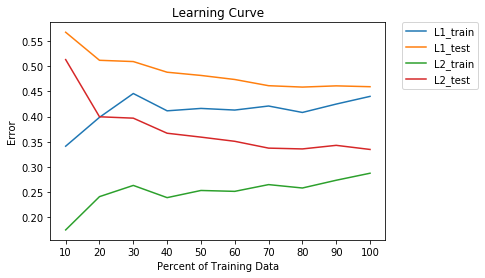

In [8]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('hw2_data/Data-set-1/X_test.txt', header=None).as_matrix()
y_test = pd.read_csv('hw2_data/Data-set-1/y_test.txt', header=None).as_matrix()

#TODO your code here: Question 1.1.1.

L1_train_errors = []
L2_train_errors = []
L1_test_errors = []
L2_test_errors = []

for i in range(1,11):
  
    # get percentage data
    num_sub = i*10
    path_sub_X = 'hw2_data/Data-set-1/Train-subsets/X_train_'+str(num_sub)+'_.txt'
    path_sub_y = 'hw2_data/Data-set-1/Train-subsets/y_train_'+str(num_sub)+'_.txt'
    
    X_sub_train = pd.read_csv(path_sub_X, header=None).as_matrix()
    y_sub_train = pd.read_csv(path_sub_y, header=None).as_matrix()
    
    # train model
    (w, b) = LinearRegression(X_sub_train, y_sub_train)
    
    # get prediction
    y_train_pred = np.dot(X_sub_train, w) + b
    y_test_pred = np.dot(X_test, w) + b
    
    # calculate L1 norm
    L1_train_error = L1_error(y_sub_train, y_train_pred)
    L1_test_error = L1_error(y_test, y_test_pred)
    
    # calculate L2 norm
    L2_train_error = L2_error(y_sub_train, y_train_pred)
    L2_test_error = L2_error(y_test, y_test_pred)
    
    # update errors list
    L1_train_errors.append(L1_train_error)
    L1_test_errors.append(L1_test_error)
    L2_train_errors.append(L2_train_error)
    L2_test_errors.append(L2_test_error)
    


plt.plot(range(10),L1_train_errors, label ='L1_train')
plt.plot(range(10),L1_test_errors, label ='L1_test')
plt.plot(range(10),L2_train_errors, label = 'L2_train')
plt.plot(range(10),L2_test_errors, label = 'L2_test')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Learning Curve")
plt.xlabel("Percent of Training Data")
plt.xticks(range(10), range(10,101,10))
plt.ylabel("Error")
plt.show()

### Q1.1.2: Analysis of model learned from full training data

Write down the weight and bias terms, $\hat{w}$ and $\hat{b}$, learned from the full training data in your Latex document. Also, write down the $L_2$ training and test error of this model. In a single figure, draw a plot of the learned linear function (input instance on the *x-axis* and the predicted value on the *y-axis*), along with a scatter plot depicting the true label associated with each test instance.

Add the resulting plot to your Latex document.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


w.SHAPE: (1, 1)
w: [[-2.23442304]]
b.SHAPE: ()
b: 1.167173881923816
L2 training error: 0.2876339586619918
L2 test error: 0.3347596869735334


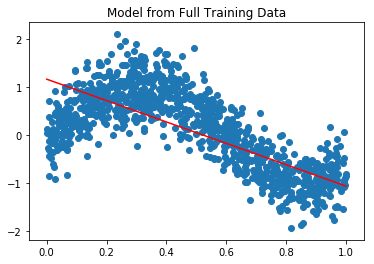

In [9]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('hw2_data/Data-set-1/X_test.txt', header=None).as_matrix()
y_test = pd.read_csv('hw2_data/Data-set-1/y_test.txt', header=None).as_matrix()
X_train = pd.read_csv('hw2_data/Data-set-1/X_train.txt',header=None).as_matrix()
y_train = pd.read_csv('hw2_data/Data-set-1/y_train.txt', header=None).as_matrix()



#TODO your code here: Question 1.1.2.

# train model on full dataset
(w, b) = LinearRegression(X_train, y_train)

# print out weight and bias
print('w.SHAPE:', w.shape)
print('w:', w)
print('b.SHAPE:', b.shape)
print('b:', b)

# get training and test prediction
y_train_pred = np.dot(X_train, w) + b
y_test_pred = np.dot(X_test, w) + b

# calculate L2 training and test error
L2_train_error = L2_error(y_train, y_train_pred)
L2_test_error = L2_error(y_test, y_test_pred)
print('L2 training error:', L2_train_error)
print('L2 test error:', L2_test_error)

x = np.linspace(0,1)
plt.plot(x,(x * w + b).T, color='red')
plt.scatter(X_test, y_test)
plt.title('Model from Full Training Data')
plt.show()

### Q1.2.1-2: Regression on different portions of training data

#### Regression on 10$\%$ of the training data. 
Use your implementation of $L_2$-regularized least squares regression to learn a model on 10$\%$ of the training data. Select the regularization parameter from the range $\{$0.1, 1, 10, 100, 500, 1000$\}$ using 5-fold cross validation on the relevant training data (you must use the folds provided in the **Data-set-2/Cross-Validation**). Draw a plot showing $\lambda$ on the *x-axis* and the training, test, and cross validation errors on the *y-axis* using the $L_2$ error. 

Then use your implementation of $L_2$-regularized least squares regression to learn a model on 10$\%$ of the training data. Plot the training, test, and cross validation errors on the *y-axis* of the same plot given each $\lambda$ (these errors do not depend on $\lambda$, so they should be horizontal lines). There should be 6 curves on the plot. Then record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors (from both types of regression) for the chosen value of $\lambda$.
        
#### Regression on 100$\%$ of the training data.

Repeat the above process, but instead learn from the full training data for both $L_2$-regularized regression as well as unregularized regression. Plot all of the errors, and record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors (from both types of regression) for the chosen value of $\lambda$.

Add the resulting curves to your Latex document.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: FutureWarning

lambda: 0.1
w: [[ 0.12109453]
 [ 0.08122992]
 [ 0.10586679]
 [-0.1349752 ]
 [-0.19179253]
 [-0.00455923]
 [ 0.01907066]
 [ 0.09867383]]
b: 0.04934075492892781
training error 87.09363431999986
test error 125.99246541235695
val error 112.60396472460552
******************************************
lambda: 1
w: [[ 0.12059449]
 [ 0.08045096]
 [ 0.10460132]
 [-0.13319788]
 [-0.1729589 ]
 [-0.00449791]
 [ 0.01881756]
 [ 0.09876524]]
b: 0.004706598183467324
training error 87.09822074779069
test error 125.60544034043807
val error 112.15708944487558
******************************************
lambda: 10
w: [[ 0.11794053]
 [ 0.07645492]
 [ 0.09809221]
 [-0.12408381]
 [-0.08212219]
 [-0.00431758]
 [ 0.01749249]
 [ 0.09900003]]
b: 0.0003372600147487073
training error 87.21498949968179
test error 123.96908235758023
val error 110.52358420481751
******************************************
lambda: 100
w: [[ 0.11260934]
 [ 0.07011989]
 [ 0.08698087]
 [-0.10310195]
 [ 0.00109494]
 [-0.00478395]
 [ 0.01595518

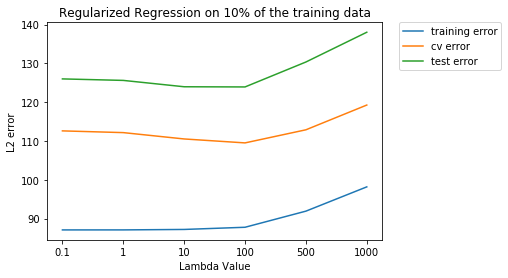

lambda: 0.1
w: [[ 0.12083821]
 [ 0.10499023]
 [ 0.09043737]
 [-0.20199794]
 [ 0.13821679]
 [ 0.00985501]
 [ 0.01336793]
 [ 0.11609619]]
b: 0.00265137463918122
training error 104.48788909130454
test error 115.67857617902833
val error 107.07140870263599
******************************************
lambda: 1
w: [[ 0.12099596]
 [ 0.10516235]
 [ 0.0907894 ]
 [-0.20235316]
 [ 0.13152115]
 [ 0.00979028]
 [ 0.01349333]
 [ 0.11605291]]
b: 0.00025419890856284363
training error 104.48871276220832
test error 115.73956074092463
val error 107.04137527660278
******************************************
lambda: 10
w: [[ 0.12173307]
 [ 0.10586938]
 [ 0.09255268]
 [-0.20286655]
 [ 0.09355847]
 [ 0.00926679]
 [ 0.01414861]
 [ 0.11550717]]
b: -3.224001951134068e-05
training error 104.52512192135991
test error 116.0482706679541
val error 106.90771359485484
******************************************
lambda: 100
w: [[ 0.11985535]
 [ 0.10203642]
 [ 0.09052741]
 [-0.17763008]
 [ 0.04409389]
 [ 0.00609244]
 [ 0.014

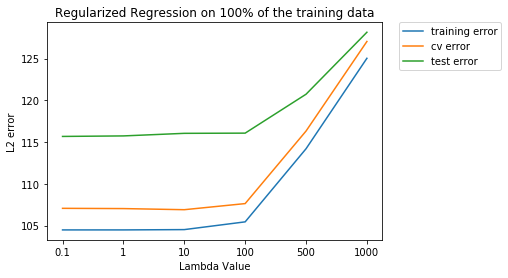

======================= OLS ============================


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:99: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:126: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:127: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1

lambda: 0.1
w: [[ 0.10922122]
 [ 0.06857459]
 [ 0.0908733 ]
 [-0.19236848]
 [-0.23666426]
 [-0.01828303]
 [ 0.00339166]
 [ 0.09943795]]
b: 41.30521255348464
training error 86.8888608746416
test error 126.64713732621314
val error 115.68325931149714
******************************************
lambda: 1
w: [[ 0.10922122]
 [ 0.06857459]
 [ 0.0908733 ]
 [-0.19236848]
 [-0.23666426]
 [-0.01828303]
 [ 0.00339166]
 [ 0.09943795]]
b: 41.30521255348464
training error 86.8888608746416
test error 126.64713732621314
val error 115.68325931149714
******************************************
lambda: 10
w: [[ 0.10922122]
 [ 0.06857459]
 [ 0.0908733 ]
 [-0.19236848]
 [-0.23666426]
 [-0.01828303]
 [ 0.00339166]
 [ 0.09943795]]
b: 41.30521255348464
training error 86.8888608746416
test error 126.64713732621314
val error 115.68325931149714
******************************************
lambda: 100
w: [[ 0.10922122]
 [ 0.06857459]
 [ 0.0908733 ]
 [-0.19236848]
 [-0.23666426]
 [-0.01828303]
 [ 0.00339166]
 [ 0.09943

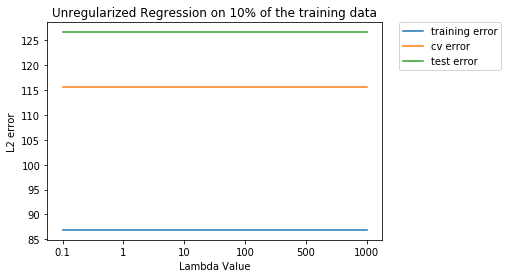

lambda: 0.1
w: [[ 0.12029708]
 [ 0.10437091]
 [ 0.08972219]
 [-0.20458945]
 [ 0.13667725]
 [ 0.00925   ]
 [ 0.01264529]
 [ 0.11608852]]
b: 1.8679030172625914
training error 104.48738463475489
test error 115.71849663074035
val error 107.44299359046406
******************************************
lambda: 1
w: [[ 0.12029708]
 [ 0.10437091]
 [ 0.08972219]
 [-0.20458945]
 [ 0.13667725]
 [ 0.00925   ]
 [ 0.01264529]
 [ 0.11608852]]
b: 1.8679030172625914
training error 104.48738463475489
test error 115.71849663074035
val error 107.44299359046406
******************************************
lambda: 10
w: [[ 0.12029708]
 [ 0.10437091]
 [ 0.08972219]
 [-0.20458945]
 [ 0.13667725]
 [ 0.00925   ]
 [ 0.01264529]
 [ 0.11608852]]
b: 1.8679030172625914
training error 104.48738463475489
test error 115.71849663074035
val error 107.44299359046406
******************************************
lambda: 100
w: [[ 0.12029708]
 [ 0.10437091]
 [ 0.08972219]
 [-0.20458945]
 [ 0.13667725]
 [ 0.00925   ]
 [ 0.01264529]
 

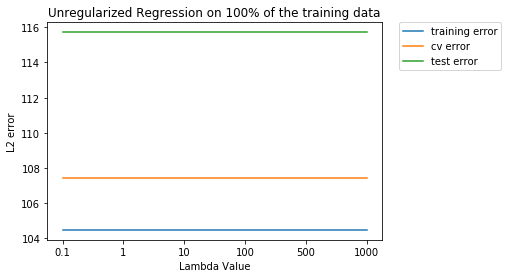

In [10]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

for i in [10, 100]:  # 10% or 100% training data
    lambdas = [.1,1,10,100,500,1000]
    X_test = pd.read_csv('hw2_data/Data-set-2/X_test.txt').as_matrix()
    y_test = pd.read_csv('hw2_data/Data-set-2/y_test.txt').as_matrix()
    X_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/X_train_'+str(i)+'_.txt', delimiter='\t',header=None).dropna(axis=1).as_matrix()
    y_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/y_train_'+str(i)+'_.txt', delimiter='\t',header=None).dropna(axis=1).as_matrix()

    
    
    #TODO your code here: Question 1.2 1/2
    
    
    train_errors = []
    cv_errors = []
    test_errors = []
    for ele_lambda in lambdas:
        
        # trian model
        (w, b) = LinearRegressionL2(X_train, y_train, ele_lambda)
        
        # calculate training error
        pred_train = np.dot(X_train, w) + b
        error_train = L2_error(y_train, pred_train)
        
        # calculate test error
        pred_test = np.dot(X_test, w) + b
        error_test = L2_error(y_test, pred_test)
        
        # calculate val error
        error_val = 0
        for k in range(1,6):
            # get val test dataset
            X_val_test = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k)+'/X_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
            y_val_test = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k)+'/y_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
            
            # get val train dataset
            X_val_train = np.asarray([[]])
            y_val_train = np.asarray([[]])
            for k_train in range(1,6):
                if k_train != k:
                    ele_X_val_train = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k_train)+'/X_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
                    ele_y_val_train = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k_train)+'/y_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
                    if X_val_train.size == 0:
                        X_val_train = ele_X_val_train
                        y_val_train = ele_y_val_train
                    else:
                        X_val_train = np.append(X_val_train, ele_X_val_train, axis=0)
                        y_val_train = np.append(y_val_train, ele_y_val_train, axis=0)
                    
            # train model
            (w_val, b_val) = LinearRegressionL2(X_val_train, y_val_train, ele_lambda)
            # get prediction on val_test
            pred_val_test = np.dot(X_val_test, w_val) + b_val
            # calculate error
            error_val_k = L2_error(y_val_test, pred_val_test)
            
            error_val += error_val_k
            
        error_val /= 5.0
        
        # update errors
        train_errors.append(error_train)
        cv_errors.append(error_val)
        test_errors.append(error_test)
        
        # output value
        print('lambda:', ele_lambda)
        print('w:', w)
        print('b:', b)
        print('training error',error_train)
        print('test error',error_test)
        print('val error',error_val)
        print('******************************************')
    
    
    plt.plot(range(6), train_errors, label='training error')
    plt.plot(range(6),cv_errors, label = 'cv error')
    plt.plot(range(6), test_errors, label = 'test error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Regularized Regression on ' + str(i) + '% of the training data')
    plt.ylabel('L2 error')
    plt.xlabel('Lambda Value')
    plt.xticks(range(6), lambdas)
    plt.show()

# ======================= OLS ============================

print('======================= OLS ============================')
for i in [10, 100]:  # 10% or 100% training data
    lambdas = [.1,1,10,100,500,1000]
    X_test = pd.read_csv('hw2_data/Data-set-2/X_test.txt').as_matrix()
    y_test = pd.read_csv('hw2_data/Data-set-2/y_test.txt').as_matrix()
    X_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/X_train_'+str(i)+'_.txt', delimiter='\t',header=None).dropna(axis=1).as_matrix()
    y_train = pd.read_csv('hw2_data/Data-set-2/Train-subsets/y_train_'+str(i)+'_.txt', delimiter='\t',header=None).dropna(axis=1).as_matrix()

    
    
    #TODO your code here: Question 1.2 1/2
    
    
    train_errors = []
    cv_errors = []
    test_errors = []
    for ele_lambda in lambdas:
        
        # trian model
        (w, b) = LinearRegression(X_train, y_train)
        
        # calculate training error
        pred_train = np.dot(X_train, w) + b
        error_train = L2_error(y_train, pred_train)
        
        # calculate test error
        pred_test = np.dot(X_test, w) + b
        error_test = L2_error(y_test, pred_test)
        
        # calculate val error
        error_val = 0
        for k in range(1,6):
            # get val test dataset
            X_val_test = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k)+'/X_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
            y_val_test = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k)+'/y_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
            
            # get val train dataset
            X_val_train = np.asarray([[]])
            y_val_train = np.asarray([[]])
            for k_train in range(1,6):
                if k_train != k:
                    ele_X_val_train = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k_train)+'/X_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
                    ele_y_val_train = pd.read_csv('hw2_data/Data-set-2/Cross-validation/Fold'+str(k_train)+'/y_'+str(i)+'_.txt',header=None).dropna(axis=1).as_matrix()
                    if X_val_train.size == 0:
                        X_val_train = ele_X_val_train
                        y_val_train = ele_y_val_train
                    else:
                        X_val_train = np.append(X_val_train, ele_X_val_train, axis=0)
                        y_val_train = np.append(y_val_train, ele_y_val_train, axis=0)
                    
            # train model
            (w_val, b_val) = LinearRegression(X_val_train, y_val_train)
            # get prediction on val_test
            pred_val_test = np.dot(X_val_test, w_val) + b_val
            # calculate error
            error_val_k = L2_error(y_val_test, pred_val_test)
            
            error_val += error_val_k
            
        error_val /= 5.0
        
        # update errors
        train_errors.append(error_train)
        cv_errors.append(error_val)
        test_errors.append(error_test)
        
        # output value
        print('lambda:', ele_lambda)
        print('w:', w)
        print('b:', b)
        print('training error',error_train)
        print('test error',error_test)
        print('val error',error_val)
        print('******************************************')
    
    
    plt.plot(range(6), train_errors, label='training error')
    plt.plot(range(6),cv_errors, label = 'cv error')
    plt.plot(range(6), test_errors, label = 'test error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Unregularized Regression on ' + str(i) + '% of the training data')
    plt.ylabel('L2 error')
    plt.xlabel('Lambda Value')
    plt.xticks(range(6), lambdas)
    plt.show()

### Q1.2 Report on Latex
Answer the following questions on Latex in the respective section.

1.2.3 For each of the two training sets considered above (10$\%$ and 100$\%$), compare the training and test errors of the models learned using unregularized least squares regression and ridge regression. What can you conclude from this about the value of regularization for small and large training sets?

1.2.4 For each of the two training sets considered above (10$\%$ and 100$\%$), what does theory predict the difference in the value of $\lambda$ would be? Which $\lambda$ should be larger? Do those values align with the conclusion you made in part 1.3?


## Q2: Batch Gradient Descent


### Gradient Descent Linear Regression

In [0]:
def LinearRegressionGD(train_data, train_labels, iters, learning_rate):
    """
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data 
        iters (int): the number of iterations to run Gradient Descent
        learning_rate (float): the alpha value for gradient descent

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term 
    """
#     w = np.array()
#     b = 0
    
    n = train_data.shape[0]
    p = train_data.shape[1]
    
    X = np.ones((n, p+1))
    X[:, 1:] = train_data
    
    # OLS method
#     down = np.linalg.inv(np.dot(X.T, X))
#     up = np.dot(X.T, train_labels)
    
#     W = np.dot(down, up)  # should be shape (p+1, 1)
    
    # BGD (Bach Gradient Descent) method
    # initiate W
    W = np.zeros((p+1,1))
    # iterate to update W
    for i in range(iters):
        W_delta = (2.0/n) * np.sum((np.dot(X, W)-train_labels)*X, axis=0)
        W_delta = W_delta[:, np.newaxis]
        W -= learning_rate * W_delta
    
    w = W[1:, :]
    b = W[0, 0]
    
    return (w, b)

### Q2.2: Batch Gradient Descent Runtime

Time the gradient descent implementation you just wrote on the full training data for Data Set 1 with iterations from range $\{$10, 100, 1000$\}$, and a learning rate of 0.01. Write down the weight and bias terms , $\hat{w}$ and $\hat{b}$, learned from the full training data in your Latex document, as well as the $L_2$ error on the test data, and the time it took to run the full process. 

In [12]:
"""
Please remember to comment out all code not contained within a function before 
submitting your file.
"""

X_test = pd.read_csv('hw2_data/Data-set-1/X_test.txt', header=None).as_matrix()
y_test = pd.read_csv('hw2_data/Data-set-1/y_test.txt', header=None).as_matrix()
X_train = pd.read_csv('hw2_data/Data-set-1/X_train.txt',delimiter='\t', header=None).dropna(axis=1).as_matrix()
y_train = pd.read_csv('hw2_data/Data-set-1/y_train.txt', header=None).as_matrix()

start = time.time()
(w,b) = LinearRegression(X_train, y_train)
y_test_pred = np.matmul(X_test, w) + b
y_train_pred = np.matmul(X_train, w) + b


L2_error(y_test, y_test_pred)
print("--- OLS Closed Form ---")
print("W:", w.T, "B:", b)
print("L2 Training Error:", L2_error(y_train, y_train_pred))
print("L2 Test Error:", L2_error(y_test, y_test_pred))
print("Time:", time.time() - start)
print()

start = time.time()
(w,b) = LinearRegressionGD(X_train, y_train, 1000, .01)
y_test_pred = np.matmul(X_test, [w]) + b
y_train_pred = np.matmul(X_train, [w]) + b
L2_error(y_test, y_test_pred)
print("---  Gradient Descent ---")
print("W:", w, "B:", b)
print("L2 Training Error:", L2_error(y_train, y_train_pred))
print("L2 Test Error:", L2_error(y_test, y_test_pred))
print("Time:", time.time() - start)

--- OLS Closed Form ---
W: [[-2.23442304]] B: 1.167173881923816
L2 Training Error: 0.2876339586619918
L2 Test Error: 0.3347596869735334
Time: 0.0034308433532714844

---  Gradient Descent ---
W: [[-1.57947694]] B: 0.8137918587300189
L2 Training Error: 0.3213964163657431
L2 Test Error: 0.3484509604983921
Time: 0.02536320686340332


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


### Q2.3 Report on Latex
Answer the followings question on Latex in the respective section.

Which algorithm runs faster? Why might that be the case? Why would we ever use gradient descent linear regression in practice while a closed form solution exists?

## Turning it in


**Remember to recomment all script portions of this notebook before submitting (i.e. any code not in a function, excluding code that imports libraries). This is to ensure that the Autograder works properly. Also make sure you did not edit other sections of the code outside of specified areas.**

1. Download this notebook as a `hw2.py` file with the functions implemented and the sandbox code commented out
  - If using Google Colab, go to "File -> Download .py"
  - If using Jupyter locally, go to "File -> Download as -> Python (.py)"
  
2. Submit `hw2.py` file to Gradescope (you can do this as many times as you'd like before the deadline)